In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
myNormal = np.load('BigData\TestBigPastelNormals.npy')[0]
myPhoto = np.load('BigData\TestBigPastelPhotos.npy')[0]
myVector = np.load('BigData\TestBigPastelVectors.npy')[0]
myAlbedo = np.load('BigData\TestBigPastelAlbedos.npy')[0]
myMask = np.load('BigData\TestBigPastelMasks.npy')[0]

In [45]:
def calculate_normal(points):
    v1 = points[1] - points[0]
    v2 = points[2] - points[0]
    normal = np.cross(v1, v2)
    return normal / np.linalg.norm(normal)

def calculate_lighting(normal, light_direction):
    light_direction = light_direction / np.linalg.norm(light_direction)
    intensity = np.dot(normal, light_direction)
    return max(intensity, 0)  

In [104]:
light_dir = myVector
light_intensity = 2.7
ratio = 0.5
lightmap = np.zeros((64,64,3))
for x in range(64):
  for y in range(64):
      one_normal = myNormal[x,y]
      intense = calculate_lighting(one_normal, light_dir)
      lightmap[x,y] = np.array([1,1,1]) * intense


[ 0.    -0.375  0.927]


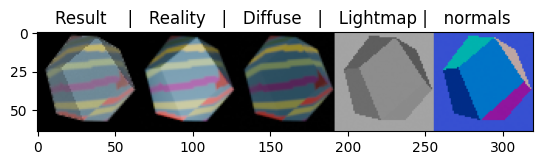

In [108]:
newThing = myAlbedo * lightmap * light_intensity
newThing = newThing  * ratio + lightmap * (1 - ratio)
newThing = (newThing / np.max( newThing)) * myMask
plt.title("Result    |   Reality   |   Diffuse   |   Lightmap |   normals ")
plt.imshow(np.concatenate([newThing, myPhoto, myAlbedo, lightmap, myNormal], axis = 1))
print(myVector)